# BA 820 Homework 3 (100 Points)

Group Member Names:

Reminder: you should not be sharing code across groups

Please submit 1) PDF answers and 2) python notebook. Grading will be based on the homework answer write up PDF. Python notebook is for reference and back up only. So please make sure that your all the outputs and answers are clearly visible in the pdf.

## 1 Latent Dirichlet Allocation [60pts]

In this problem, we will use Latent Dirichlet Allocation to perform topic modeling on Amazon Review datasets. In particular, we will take an in-depth look at different aspects of LDA model.

## 1.1 Installation

To perform LDA and visualize, please use Python 3.X. You will also need to install Numpy, Scipy, gensim, nltk, pyLDAvis library. Refer to requirements.txt for more details.
Use the following code to install the labraries.

In [1]:
%pip install gensim
# install gensim for LDA
%pip install nltk 
# install nltk to preprocess sentences
%pip install pyldavis
# to visualize LDA topics
%pip install matplotlib 
# for plotting

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


The cell below tests if the packages we need have been installed correctly, and that we are in the correct environment.

In [2]:
import gensim
import nltk
nltk.download("stopwords")

import matplotlib
%matplotlib inline
import gzip # to unzip the data
import re # to replace punctuations
from nltk.corpus import stopwords # list of stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\王澍\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
!python -m pip install -U pyLDAvis

## 1.2 Datasets

You can download the Amazon reviews dataset of Cellphones & Accessory 5-Core Data [here](http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Cell_Phones_and_Accessories_5.json.gz). Place the downloaded dataset in the same folder as this notebook. You can use the following code to read a datat from GZIp file

In [4]:
# A function to read the zipped data at a specfic path
#
# How to use:
# PATH = "/path/to/file"
# for line in parse(PATH):
#   do something with line
#
def parse(path):
    g = gzip.open(path, 'r')
    for l in g:
        yield eval(l)

## 1.3 Data Cleaning

Now we will preprocess the data using the following steps:
   1. Remove stopwords
   2. Lower-case all words
   3. Remove words with less than 2 characters
   4. Remove punctuation
   5. Split each sentence into a list of words

In [5]:
import re

In [5]:
# A function to clean a single line of text
def clean_line(line):
    """ Clean stopwords and punction for each line
    
    Args: 
        line (string): one line in file
        
    Returns:
        list(str): a list of all words in the sentence
    """
    punctuationRegex = r'\W+|\d+'
    stopWords = set(stopwords.words('english'))
    line = line.split(" ")
    filtered_content = []
    
    for word in line:
        word = word.lower()
        
        if (word not in stopWords) and (len(word)) > 1:
            filtered_content.append(re.sub(punctuationRegex,'', word))
        #remove empty string
        filtered_content = list(filter(None, filtered_content))
            
    
    
    
    return filtered_content

Finally, we put parse() and clean_line() function together and then extract the first 10,000 reviews into a new text file as your experiment dataset

In [6]:
def read_dataset(fname):
    """ Read the 10000 lines in given dataset into list and clean stop words. 
        
    Args: 
        fname (string): filename of Amazon Review Dataset
        
    Returns:
        list of list of words: we view each document as a list, including a list of all words 
    """
    count = 0
    exp_dataset = []
    for review in parse(fname):
        line = review["reviewText"]
        new_line = clean_line(line)
        exp_dataset.append(new_line)
        count += 1
        if count > 10000:
            break
    return exp_dataset

In [7]:
%%time
r = read_dataset("reviews_Cell_Phones_and_Accessories_5.json.gz")

Wall time: 7.78 s


## 1.4 Topic Analysis

**[5pts] Q1.4.1.1** Use topic numbers 3, 6, 9, 12, 15 respectively and print out all topics with 5 words.

For this We will use gensim to train an LDA model. gensim requires the following steps:

Construct a gensim.corpora.dictionary from the dataset
Construct a gensim "corpus" using this dictionary, by mapping each word to an index in the dictionary
Run LDA on this corpus

In [10]:
import gensim

from gensim import corpora

In [11]:
dictionary = corpora.Dictionary(r) # create a gensim dictionary, store it in variable "dictionary"
corpus = [dictionary.doc2bow(word) for word in r]# create the gensim corpus, store it in variable "corpus"

The function below prints the top num words in each topic for a given model.

In [12]:
import pprint

def print_topic_words(model,num):
    """ print top words in model topics.
    
    Args: 
        model: LDA model
        
    Returns:
        none
    """    
    for topic_id, topic in model.show_topics(num_topics=-1, num_words=num, formatted=False):
        print(f"Topic {topic_id}: ")
        for word, weight in topic:
            print(f"    {word} ({weight:.2f})")
        print()

The following function builds multiple LDA models with number of topics specified in the list `num_topics`.

In [13]:
def build_num_topic_model(dictionary, corpus, num_topics):
    """ Build lda model with given parameters, use print_topic_words to print words
    
    Args: 
        dictionary: dictionary built from dataset
        corpus: corpus built from dataset
        num_topics: list of numbers
        
    Returns:
        none
    """    
    for num_topic in num_topics:
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=dictionary,
                                                num_topics=num_topic,
                                                random_state=100,
                                                update_every=1,
                                                chunksize=100,
                                                passes=10,
                                                alpha='auto',
                                                per_word_topics=True)
        # Print the top 5 words for each topic
        print(f"Top 5 words for {num_topic} topics:")
        print_topic_words(model,5)
    return

In [14]:
build_num_topic_model(dictionary, corpus, [3, 6, 9, 12, 15])

Top 5 words for 3 topics:
Topic 0: 
    battery (0.03)
    iphone (0.02)
    pack (0.01)
    juice (0.01)
    phone (0.01)

Topic 1: 
    screen (0.03)
    phone (0.02)
    camera (0.01)
    n (0.01)
    nokia (0.01)

Topic 2: 
    case (0.03)
    iphone (0.01)
    headset (0.01)
    use (0.01)
    pocket (0.01)

Top 5 words for 6 topics:
Topic 0: 
    one (0.03)
    great (0.02)
    good (0.02)
    would (0.01)
    battery (0.01)

Topic 1: 
    gs (0.03)
    iphones (0.02)
    increase (0.02)
    addon (0.02)
    nokia (0.02)

Topic 2: 
    iphone (0.07)
    case (0.06)
    mophie (0.03)
    juice (0.03)
    fit (0.02)

Topic 3: 
    home (0.12)
    convenient (0.09)
    button (0.05)
    again (0.04)
    broke (0.02)

Topic 4: 
    headset (0.03)
    bluetooth (0.02)
    ear (0.02)
    sound (0.02)
    quality (0.02)

Topic 5: 
    phone (0.05)
    battery (0.04)
    use (0.03)
    pack (0.03)
    need (0.02)

Top 5 words for 9 topics:
Topic 0: 
    one (0.04)
    great (0.03)
    it

**[3pts] Q1.4.1.2**  Explain what could be interpreted for each topics, and describe the similarity and difference between different topic numbers.

These topics are related to customer reviews for a product,they can be interpreted as:  
(1) Overall positive reviews, e.g. "great", "good", "well"  
(2) Description of the product's performance, e.g. "quality", "fit", "worked"  
(3) Reviews of personal purchasing and using experience, e.g. "bought", "got", "used", "ordered"  
(4) Different types of phone accessories, e.g. "battery", "cable", "headset", "charger", "screen", "bluetooth"  
(5) Some brands of phone manufacturers, e.g. "nokia", "samsung".  

As topic numbers differs, the most common topics stay the same and are identified repeatedly, like the interpretion (1)(2)(3);  
but higher-number models can capture more details, the first topic of the 3-topics model contains "battery", "iphone", "pack", "juice", "phone", while the 15-topics model is able to distinguish "battery", "pack", "juice" from "iphone" and "phone", assign them into different topics with more collrelated words.

**[2pts] Q1.4.1.3**  Which topic number would you choose? Explain.

We would choose 12, because the 12-topics model balances between "overall user experience" and "product accessory details", it gives us more information than fewer-topics models, and is more generalized than the 15-topics model.  

## 1.5 Model Evaluation

**[12 pts] Q1.5.1** Now we investigate two methods to evaluate our model and choose the topic number

1.Perplexity is a measurement of how well a probability distribution or probability model predicts a sample. A low perplexity indicates the probability distribution is good at predicting the sample. We can use model.log_perplexity(document) to evaluate the perplexity of our LDA model.

2.Topic coherence is a one type of interpretability measurement for a topic. It measures if a set of top keywords describe a coherent and singular concept. A good topic will have high topic coherence score. We can use CoherenceModel(model=ldamodel).get_coherence() to calculate it.

Plot Perplexity and topic coherence scores of our LDA model for topic number 3,6,9,12,15,20,50.

The code below trains topic models with different numbers of topics and measures their coherence and perplexity.

In [15]:
# perplexity 
# run different number of topics to get perplexity and coherence value for this model
from gensim.models.coherencemodel import CoherenceModel
def get_measurement_for_model(dictionary, corpus, topic_nums):
    """ Build lda model with given parameters 
    
    Args: 
        dictionary: dictionary built from dataset
        corpus: corpus built from dataset
        topic_nums: a list contains all possible topic number
        
    Returns:
        2 lists: one of perplexities, and one of coherence value
    """  
    perplexity = []
    coherence_value=[]
    for num_topic in topic_nums:
        lda_model =  gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topic, passes=10,random_state = 100)
        perplexity.append(lda_model.log_perplexity(corpus))
        coherence_model_lda = CoherenceModel(model=lda_model, corpus = corpus, dictionary=dictionary,coherence='u_mass')
        coherence_value.append(coherence_model_lda.get_coherence())
        #   - Compute and store coherence
        #   - Compute and store perplexity
        #########################
    return perplexity,coherence_value

In [16]:
perplexity, coherence = get_measurement_for_model(dictionary, corpus, [3, 6, 9, 12, 15, 20, 50])

In [17]:
print(perplexity)
print(coherence)

[-7.908686474115575, -7.934830146974402, -8.235094819075984, -8.566418813471827, -8.83944224906722, -9.158269620559366, -11.305392894035721]
[-1.8242849742294032, -2.075711583042866, -4.931661796046448, -5.596069906522857, -9.879550736089534, -7.519184456309688, -8.07819140833444]


We can now plot the coherence and perplexity of each model.

In [18]:
import matplotlib.pyplot as plt

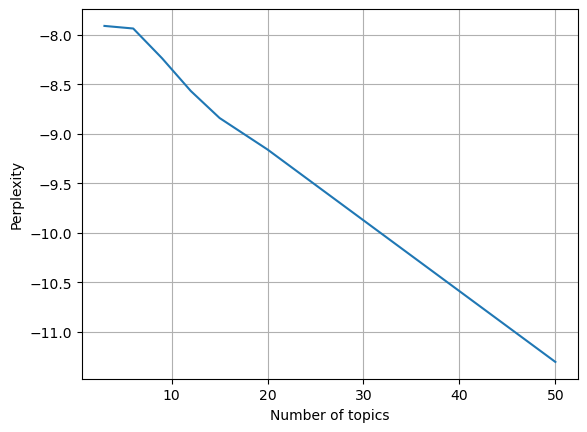

In [19]:
plt.plot([3, 6, 9, 12, 15, 20, 50], perplexity)
plt.grid()
plt.xlabel("Number of topics")
plt.ylabel("Perplexity")
plt.show()

**[2pts] Q1.5.2**  From the above graph what topic number would you choose and why? Is it a good idea to choose the topic number based on perplexity? why or why not?

Based on the above graph and perplexity, we would choose number of topics = 50, but it's not a good idea to choose the topic number based only on perplexity. Low perplexity means more distinct and easier to interpret, but can also lead to redundancies, so based on the specific goals of the analysis, it's helpful to take coherence scores into consideration.

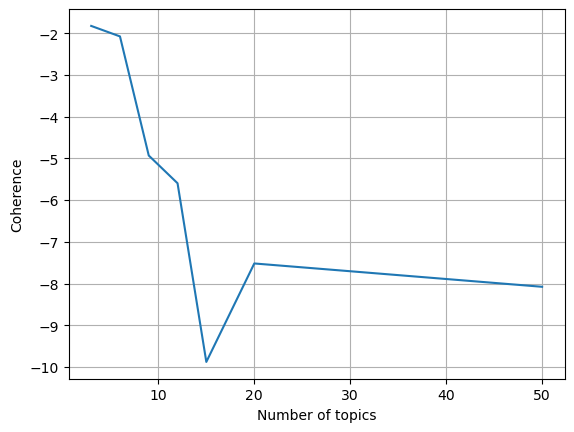

In [20]:
plt.plot([3, 6, 9, 12, 15, 20, 50], coherence)
plt.grid()
plt.xlabel("Number of topics")
plt.ylabel("Coherence")
plt.show()

**[2pts] Q1.5.3**  From the above graph what topic number would you choose and why?

Based on the above graph and coherence, we would choose number of topics = 3, because it has the highest coherent score.

**[4pts]Q1.5.4** Compare two methods you implemented in the previous quesions, which one do you think is better and why? In answering, please discuss the actual topics generated.

We think 12-topics would be better, because it balances between perplexity and coherence, the actual topics generated can be interpreted as: 

Topic 0: Overall positive comments of the function of the product  
one (0.06)   great (0.06)   works (0.03)   work (0.03)   product (0.02)   

Topic 1: Install the cables  
gs (0.22)   something (0.11)   cables (0.11)   apply (0.03)   husband (0.03)   

Topic 2: The case can be put in to jeans
case (0.29)   thanks (0.04)   putting (0.04)   bulk (0.04)   jeans (0.04)    

Topic 3: The size ofthe product matches iphone  
iphone (0.22)   fit (0.05)   bottom (0.05)   size (0.04)   theres (0.03)    

Topic 4: The charging cable and plug  
juice (0.08)   cable (0.03)   charge (0.03)   g (0.03)   plug (0.03)   

Topic 5: The product covers something and protects it  
protective (0.08)   quite (0.05)   longer (0.04)   item (0.04)   cover (0.03)   

Topic 6: Extended battery life  
battery (0.23)   mophie (0.11)   life (0.07)   doubles (0.05)   handy (0.03)  

Topic 7: The need of the product on phone  
phone (0.06)   use (0.05)   pack (0.03)   little (0.02)   need (0.02)  

Topic 8: Possitive comments on bluetooth and screen  
good (0.03)   would (0.03)   bluetooth (0.02)   screen (0.02)   around (0.02)   

Topic 9: Some altinative probabilities  
otherwise (0.15)   started (0.04)   sometimes (0.04)   black (0.03)   htc (0.03)   

Topic 10: About audio device
headset (0.04)   ear (0.03)   quality (0.03)   sound (0.03)   device (0.02)  

Topic 11: Possitive comments about the services  
convenient (0.10)   excellent (0.04)   everything (0.04)   service (0.03)   you (0.03)

## 1.6 Alpha and Beta in LDA

**[7pts]Q1.6.1** In this problem, we will check the two most important parameters in LDA model: alpha and beta. Alpha represents document-topic density - with a higher alpha, documents are made up of more topics, and with lower alpha, documents contain fewer topics. Beta represents topic-word density - with a high beta, topics are made up of most of the words in the corpus, and with a low beta they consist of few words.

In [21]:
best_topic_num = 12 # CHANGE THIS

In [22]:
model1 =  gensim.models.ldamodel.LdaModel(corpus=corpus,
                                         id2word=dictionary,
                                         num_topics=best_topic_num,
                                         random_state=100,
                                         update_every=1,
                                         chunksize=100,
                                         passes=10,
                                         alpha=1/best_topic_num,
                                         eta = 1/best_topic_num,
                                         per_word_topics=True)

print(f"Top 5 words for {best_topic_num} topics:")
print_topic_words(model1, num=5)
print()

Top 5 words for 12 topics:
Topic 0: 
    one (0.04)
    great (0.03)
    good (0.02)
    works (0.02)
    product (0.02)

Topic 1: 
    gs (0.19)
    regularly (0.15)
    something (0.09)
    cables (0.09)
    apply (0.02)

Topic 2: 
    case (0.26)
    away (0.05)
    thanks (0.04)
    bulk (0.04)
    putting (0.04)

Topic 3: 
    theres (0.05)
    uses (0.05)
    small (0.04)
    bit (0.03)
    keep (0.03)

Topic 4: 
    cable (0.03)
    usb (0.03)
    plug (0.03)
    port (0.03)
    charge (0.03)

Topic 5: 
    iphones (0.06)
    protective (0.05)
    matte (0.05)
    quite (0.03)
    longer (0.02)

Topic 6: 
    battery (0.21)
    mophie (0.10)
    life (0.06)
    doubles (0.05)
    handy (0.03)

Topic 7: 
    phone (0.04)
    use (0.04)
    pack (0.03)
    juice (0.03)
    need (0.02)

Topic 8: 
    bluetooth (0.03)
    screen (0.03)
    bottom (0.03)
    fit (0.02)
    however (0.02)

Topic 9: 
    iphone (0.51)
    package (0.06)
    otherwise (0.06)
    started (0.02)
    somet

In [23]:
model2 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                         id2word=dictionary,
                                         num_topics=best_topic_num,
                                         random_state=100,
                                         update_every=1,
                                         chunksize=100,
                                         passes=10,
                                         alpha=1/2,
                                         eta = 1/5,
                                         per_word_topics=True)

print(f"Top 5 words for {best_topic_num} topics:")
print_topic_words(model2, num=5)
print()

Top 5 words for 12 topics:
Topic 0: 
    one (0.04)
    great (0.03)
    product (0.03)
    price (0.03)
    works (0.02)

Topic 1: 
    gs (0.10)
    cables (0.05)
    mount (0.02)
    cradle (0.01)
    sturdy (0.01)

Topic 2: 
    case (0.11)
    pocket (0.03)
    bottom (0.03)
    little (0.03)
    fit (0.02)

Topic 3: 
    owners (0.04)
    trade (0.04)
    n (0.03)
    nokia (0.03)
    service (0.02)

Topic 4: 
    juice (0.07)
    use (0.03)
    cable (0.03)
    plug (0.03)
    charger (0.02)

Topic 5: 
    sleek (0.04)
    rather (0.04)
    regularly (0.04)
    love (0.03)
    recommend (0.03)

Topic 6: 
    battery (0.19)
    life (0.05)
    doubles (0.04)
    handy (0.02)
    thanks (0.02)

Topic 7: 
    phone (0.03)
    use (0.02)
    get (0.01)
    one (0.01)
    like (0.01)

Topic 8: 
    headset (0.03)
    bluetooth (0.03)
    ear (0.03)
    sound (0.02)
    quality (0.02)

Topic 9: 
    iphone (0.21)
    mophie (0.09)
    screen (0.05)
    air (0.03)
    otherwise (0.02)


In [24]:
model3 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                         id2word=dictionary,
                                         num_topics=best_topic_num,
                                         random_state=100,
                                         update_every=1,
                                         chunksize=100,
                                         passes=10,
                                         alpha='auto',
                                         eta = 'auto',
                                         per_word_topics=True)

print(f"Top 5 words for {best_topic_num} topics:")
print_topic_words(model3, num=5)
print()

Top 5 words for 12 topics:
Topic 0: 
    one (0.06)
    great (0.06)
    works (0.03)
    work (0.03)
    product (0.02)

Topic 1: 
    gs (0.22)
    something (0.11)
    cables (0.11)
    apply (0.03)
    husband (0.03)

Topic 2: 
    case (0.29)
    thanks (0.04)
    putting (0.04)
    bulk (0.04)
    jeans (0.04)

Topic 3: 
    iphone (0.22)
    fit (0.05)
    bottom (0.05)
    size (0.04)
    theres (0.03)

Topic 4: 
    juice (0.08)
    cable (0.03)
    charge (0.03)
    g (0.03)
    plug (0.03)

Topic 5: 
    protective (0.08)
    quite (0.05)
    longer (0.04)
    item (0.04)
    cover (0.03)

Topic 6: 
    battery (0.23)
    mophie (0.11)
    life (0.07)
    doubles (0.05)
    handy (0.03)

Topic 7: 
    phone (0.06)
    use (0.05)
    pack (0.03)
    little (0.02)
    need (0.02)

Topic 8: 
    good (0.03)
    would (0.03)
    bluetooth (0.02)
    screen (0.02)
    around (0.02)

Topic 9: 
    otherwise (0.15)
    started (0.04)
    sometimes (0.04)
    black (0.03)
    htc (0

**[3pts]1.6.2**  Explain how the different alpha and beta values theoretically influence the LDA model. Then describe what you find in the empirical result (e.g difference in topic words and topics)

Alpha value influences how many topics a document is likely to contain, Beta value inluences how many words a topic is likely to contain.

The difference in alpha and beta value resulted in different topics and words generated.Take topic 0 for example.Although all 3 models has topic one related to following five words:
    one 
    
   great
    
   works 
   
   work
   
   product
    
There weight is not exactly the same.Some of the topics in a model include general comments on products(good,lovely,recommend) while other models have fewer general comments on products. Some models have more topic words related to the product itself.

## 1.7 LDA on a short text dataset

**[10pts]1.7.1** In this part, we will read a dataset from twitter and build a LDA model. On Windows, download and unzip the dataset from [this link](http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip). Place the downloaded dataset in the same folder as this notebook. Use the first 10,000 lines in the "training.1600000.processed.noemoticon.csv" file. 

In [ ]:
!wget http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip # Linux and OSX only
!unzip trainingandtestdata.zip # Linux and OSX only 

In [ ]:
!head -n 10000 training.1600000.processed.noemoticon.csv > twitter.csv # Linux and OSX only

In [21]:
import pandas as pd
# read the top n rows of csv file as a dataframe
df = pd.read_csv("training.1600000.processed.noemoticon.csv", nrows=10000)

df.to_csv('twitter.csv', index=False,encoding='utf-8')

In [22]:
punctuationRegex = r'\W+|\d+'
stopWords = set(stopwords.words('english'))

In [23]:
def read_twitter(fname):
    """ Read the given dataset into list and clean stop words. 
    
    Args: 
        fname (string): filename of Twitter Dataset
        
    Returns:
        list of list of words: we view each document as a list, including a list of all words 
    """
    twitter = []
    
    with open(fname,encoding="utf-8") as f:
        for line in f:
            tweet = line.split(",")[5]
            sep = tweet.split(" ")
            content = []
            for word in sep:
                word = word.lower()
        
                if (word not in stopWords) and (len(word)) > 1:
                    content.append(re.sub(punctuationRegex,'', word))
                content = list(filter(None, content))
            twitter.append(content)
            
    return twitter
        

In [24]:
%%time
twitter = read_twitter('twitter.csv')

Wall time: 201 ms


In [25]:
twitter_dictionary = corpora.Dictionary(twitter)
twitter_corpus = [twitter_dictionary.doc2bow(word) for word in twitter]

In [27]:
%%time
best_topic_num=10
twitter_model = gensim.models.ldamodel.LdaModel(corpus=twitter_corpus,
                                         id2word=twitter_dictionary,
                                         num_topics=best_topic_num,
                                         random_state=100,
                                         update_every=1,
                                         chunksize=100,
                                         passes=10,
                                         per_word_topics=True)

print(f"Top 5 words for {best_topic_num} topics:")
print_topic_words(twitter_model, num=5)
print()

Top 5 words for 10 topics:
Topic 0: 
    go (0.12)
    amp (0.10)
    theres (0.09)
    area (0.08)
    still (0.03)

Topic 1: 
    think (0.13)
    problem (0.11)
    online (0.11)
    going (0.04)
    need (0.02)

Topic 2: 
    work (0.10)
    lol (0.04)
    tomorrow (0.04)
    morning (0.03)
    new (0.02)

Topic 3: 
    get (0.07)
    cant (0.06)
    good (0.04)
    well (0.03)
    much (0.02)

Topic 4: 
    back (0.06)
    bed (0.05)
    sick (0.05)
    hope (0.04)
    hate (0.03)

Topic 5: 
    im (0.10)
    got (0.05)
    like (0.03)
    sorry (0.03)
    know (0.03)

Topic 6: 
    yesterday (0.14)
    day (0.06)
    really (0.04)
    im (0.03)
    last (0.03)

Topic 7: 
    sad (0.05)
    wish (0.04)
    i (0.03)
    could (0.02)
    something (0.02)

Topic 8: 
    today (0.17)
    connection (0.12)
    feel (0.03)
    bad (0.02)
    getting (0.02)

Topic 9: 
    anything (0.13)
    slow (0.13)
    night (0.04)
    time (0.03)
    im (0.02)


Wall time: 30.3 s


## 1.8 LDA visualization

**[10pts]1.8.1** We will now visualize the LDA output using pyLDAvis. PyLDAVis shows the following:

   1. The distances between topics, as a map in 2-D space.
   2. The variance in the topic-word distribution, as the size of a circle in this map.
   3. The most "salient" terms in each topic.

In [28]:
sentences = read_dataset("reviews_Cell_Phones_and_Accessories_5.json.gz")[:1000] # CHANGE TO YOUR DATASET

In [29]:
%%time
import pyLDAvis.gensim

Wall time: 1.46 s


In [30]:
from gensim import corpora, models, similarities, downloader

In [35]:
dictionary_pt = corpora.Dictionary(sentences)

# Create a bag of words representation of the dataset
corpus_pt = [dictionary_pt.doc2bow(document) for document in sentences]

# Train an LDA model on the corpus
lda_model = gensim.models.ldamodel.LdaModel(corpus_pt, num_topics=5, id2word=dictionary_pt)

In [36]:
import pyLDAvis.gensim_models
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus_pt,dictionary = dictionary_pt)

C:\Users\yujia\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [37]:
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

# 2.word2Vec [40pts]


In this problem, we use Amazon Review Dataset to perform Word2Vec and Doc2Vec to extract insights relevant for e-commerce business. For this question, download and use the dataset [here](http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz||reviews_Electronics_5.json.gz).

## 2.1 Data Cleaning



The following code reads the data from a GZIP file.

In [31]:
# A function to read the zipped data at a specfic path
#
# How to use:
# PATH = "/path/to/file"
# for line in parse(PATH):
#   do something with line
#
def parse(path):
    g = gzip.open(path, 'r')
    for l in g:
        yield eval(l)

We will now read the data and preprocess it using the following steps:

   1. Remove stopwords
   2. Lower-case all words
   3. Remove words with less than 2 characters
   4. Remove punctuation
   5. Split each sentence into a list of words

   And finally extract 10000 reviews.

In [32]:
# A function to clean a single line of text
def clean_line(line):
    """ Clean stopwords and punction for each line
    
    Args: 
        line (string): one line in file
        
    Returns:
        list(str): a list of all words in the sentence
    """
    line = line.split(" ")
    filtered_content = []
    for word in line:
        
        word = word.lower()
        
        if (word not in stopWords) and (len(word)) > 1:
            filtered_content.append(re.sub(punctuationRegex,'', word))
        filtered_content = list(filter(None, filtered_content))
    return filtered_content

def read_dataset(fname):
    """ Read the 100000 lines in given dataset into list and clean stop words. 
        
    Args: 
        fname (string): filename of Amazon Review Dataset
        
    Returns:
        list of list of words: we view each document as a list, including a list of all words 
    """
    count = 0
    exp_dataset = []
    for review in parse(fname):
        line = review["reviewText"]
        new_line = clean_line(line)
        exp_dataset.append(new_line)
        count += 1
        if count > 100000:
            break
    return exp_dataset    

In [33]:
%%time
r2 = read_dataset("reviews_Electronics_5.json.gz")

Wall time: 36.2 s


## 2.2 Build a doc2vec model

**[3pts]2.2.1** In this question, first we will build a Word2Vec model using ginsim using size=300, min_count=40, win- dow=10, negative=10, max_vocab_size=10000. Train the model for 30 epochs.

In [34]:
from gensim.models import Word2Vec

dat = r2
model = Word2Vec(dat, vector_size=300, window=10, min_count=40, negative=10, max_vocab_size=10000, workers=4)

model.train(dat, total_examples=len(r2), epochs=30)

(139070585, 169477560)

**[2pts]2.2.2** Use model.wv.doesnt_match to find a word in ["Canon","Nikon","junk"] that does not belong.

In [35]:
word_list = ["Canon", "Nikon", "junk"]
odd_word = model.wv.doesnt_match(word_list)
print("The odd word is:", odd_word)

The odd word is: junk


**[3pts]2.2.3** Come up with 3 other word lists and apply the above function. Explain your observation.

In [36]:
word_list2 = ["camera", "perfect", "wonderful"]
odd_word2 = model.wv.doesnt_match(word_list2)
print("The odd word is:", odd_word2)

The odd word is: camera


"Canon" and "Nikon" are camera brands, and "junk" does not belong,  "perfect" and "wonderful" are adjectives while "camera" is a noun. The doc2vec model is able to capture the similarity and dissimilarity between words, and find the word that doesn't belong.

**[2pts]2.2.4** What are some tasks in e-commerce that can be solved with this simple function?

With this function, it is easy to find similar brand name, helping companies to quickly identify their competitors.

It is also easier to filter certain words/comments in review. Companies can get a brief understanding of whether the comments contains many negative/positive words.

## 2.3 Build a doc2vec model

**[15 pts] 2.3.1**  Each review is marked by other customers as “helpful” or not. The "helpful: [a, b]" item in each review is (a) the number of people who marked the review as helpful, and (b) the total number of people who have marked the review as helpful or unhelpful. The "helpfulness" score of a review can be calculated as a/b. Define a "helpful" review as one with helpfulness score >= 0.8. Given a review that is only slightly helpful, could we find textually similar reviews but have higher helpfulness? Build Doc2Vec model with gensim on review data. Use product ID “B00006I5WJ” and ReviewerID with “A14453U0KFWF31” as an example, find top 5 helpful reviews of the same product with similarity score above 0.8. 

In [37]:
import os
def read_reviewers_data(fname, min_count=0):
    '''
    Save all reviews into their own product asin files.
    Make sure you have 'product' folder when you run this answer.
    In each file, you can choose your own log structure. In this answer, log 
    strucutre is like 
        "reviewText"\t"reviewerID"\t"helpful"
    Args: 
        fname: dataset file path
        min_count: minimum number of reviews of a product
    Returns:
        none
    '''
    if not os.path.isdir('product'):
        os.makedirs('product')
    asin_list = []
    tmp_list = []
    last_asin = ""
    j = 0
    for i in parse(fname):
        if last_asin != i['asin']:
            if len(tmp_list) > min_count:
                f = open("product/" + last_asin+".txt", 'w')
                for one in tmp_list:
                    f.write(one)
                f.close()
            tmp_list = []
            last_asin = i['asin']
        tmp_list.append(i["reviewText"] + '\t' + i["reviewerID"] +
                    '\t' + handle_helpful(i["helpful"]) + "\n")
        j += 1
        if j > 100000:
            break
            
def handle_helpful(helpful):
    '''
    Helper function for helpful_score calculate
    Args: 
        helpful: list. The first element is the number of people think this is helpful. The second element
            is the total number of people evaluate this comment
    Returns:
        String: number represent helpfulness
    '''
    if helpful[1] != 0:
        helpfulness = 1.0 * helpful[0] / helpful[1]
        return str(helpfulness)
    else:
        return str(0)

In [38]:
read_reviewers_data("reviews_Electronics_5.json.gz")

In [39]:
class TaggedReviewDocument(object):
    '''
    This class could save all products and review information in its dictionary and generate iter for TaggedDocument
        which could used for Doc2Vec model
    '''
    def __init__(self, dirname):
        self.dirname = dirname
        self.helpfulness = {}  # key:reviewerID value:helpfulness
        self.product = {}      # key:asin value:reviewerID
        self.asin = []

    def __iter__(self):
        for filename in os.listdir(self.dirname):
            asin_code = filename[:-4] #delete ".txt"
            self.product[asin_code] = []
            self.asin.append(asin_code)
            for line in enumerate(open(self.dirname + "/" + filename)):
                line_content = line[1].split("\t")
                self.product[asin_code].append(line_content[1])
                self.helpfulness[line_content[1]] = float(line_content[2])
                yield TaggedDocument(clean_line(line_content[0]), [line_content[1], line_content[2]])



In [40]:
documents = TaggedReviewDocument("product")

In [53]:
%%time
from gensim.models.doc2vec import TaggedDocument, Doc2Vec

model_v = Doc2Vec(documents, vector_size=100, window=2, min_count=1, workers=4)

Wall time: 8min 15s


In [50]:
model_v

## Find similar reviews

In [63]:
def find_similar_reviews(asin,reviewer_id):
    '''
    If one review is similar to the specefic review and it is much helpful, save it to a list
    Args: 
        asin: product asin
        reviewer_id: the specific review
    Returns:
        list of reviewer id
        
    '''
    result = []
    model_v.save('d2v.model')
    
    # Get the vector representation of the target review
    target_vec = model_v.infer_vector([reviewer_id])
    
    # Find similar reviews to the target review
    similar_docs = model_v.wv.most_similar([target_vec], topn=5)
    
    # Filter out helpful reviews with helpfulness score >= 0.8
    helpful_docs = [(doc_id, score) for doc_id, score in similar_docs 
                    if documents.helpfulness[doc_id] >= 0.8 and doc_id != reviewer_id and doc_id.startswith(asin)]
    
    # Sort the remaining helpful reviews by helpfulness score and similarity score
    helpful_docs.sort(key=lambda x: (x[1], documents.helpfulness[x[0]]), reverse=True)
    
    # Return the top 5 reviews with highest helpfulness score and similarity score
    for doc_id, _ in helpful_docs[:5]:
        result.append(doc_id)
    
    return result


In [95]:
def find_similar_reviews(asin, reviewer_id):
    """
    Find top 5 helpful reviews of the same product with similarity score above 0.8.
    Args:
        asin (str): Product asin.
        reviewer_id (str): Reviewer ID of the example review.
    Returns:
        list of str: Top 5 most helpful reviewer IDs.
    """
    result = []
    example_review = documents.product[asin].index(reviewer_id)
    example_vector = model_v[example_review]
    for i, doc in enumerate(model_v.docvecs):
        if i != example_review:
            
            similarity = model_v.similarity_unseen_docs(model_v, [doc], [example_vector])
            if similarity > 0.8 and documents.helpfulness[documents.product[asin][i]] > 0.8:
                result.append(documents.product[asin][i])
                if len(result) == 5:
                    break
    return result

In [ ]:
print(find_similar_reviews("B00006I5WJ", "A14453U0KFWF31")) 

## 2.4 Build a doc2vec model using product descriptions


**[10pts]2.4.1** Use product descriptions (located in meta data  [here](http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/meta_Electronics.json.gz)) to build a Doc2Vec model. When building the doc2vec model, use vector_size=100, window=15, min_count=5, max_vocab_size=1000, and train it for 1 epoch.

In [75]:
def read_product_description(fname):
    '''
    Load all product descriptions
    Args: 
        fname: dataset file path
    Returns:
        dict: key is asin, value is description content
    '''
    result = {}
    for i in parse(fname):
        try:
            if "Camera & Photo" in i["categories"][0]:
                result[i["asin"]]=i["description"]
        except:
            continue
    return result

In [76]:
class TaggedDescriptionDocument(object):
    '''
    This class could save all products and review information in its dictionary and generate iter for TaggedDocument
        which could used for Doc2Vec model
    '''
    def __init__(self, descriptondict):
        self.descriptondict = descriptondict
        

    def __iter__(self):
        for asin in self.descriptondict:
            for content in self.descriptondict[asin]:
                yield TaggedDocument(clean_line(content), [asin])


In [77]:
description_dict = read_product_description("meta_Electronics.json.gz")
des_documents = TaggedDescriptionDocument(description_dict)

In [ ]:
model_d = Doc2Vec(des_documents, vector_size=100, window=15, min_count=5, max_vocab_size=1000,epoch = 1)



**[5pts]2.4.2** Find the most similar product for Canon EOS 5D (asin:B0007Y791C) not made by Canon.

In [ ]:
def similar_product(asin):
    result = []
    example_review = documents.product[asin].index(reviewer_id)
    example_vector = model_v[example_review]
    

**Reference** 

This notebook refers to the course materials posted by professor:  

LDA-Demo.ipynb  
LDA-with-Gensim-Demo.ipynb  
word2vec-Demo.ipynb